In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3 
import os

In [8]:
# FPL Data
folder_db = '/data/databases/'
folder_raw = '/data/raw_files/'

# Get the directory of the current script
current_directory = os.path.abspath('')


db_path = os.path.join(current_directory + folder_db, "fpl_data.db")
conn = sqlite3.connect(db_path)
df_fpl = pd.read_sql_query('SELECT * FROM fpl_data', conn)
conn.close()

/Users/richard/Desktop/Projects/football-streamlit-app/football-streamlit-app/data/databases/fpl_data.db


In [33]:
data_path = os.path.join(current_directory + folder_raw)
df_test_folder = pd.read_csv(data_path + '/team_ranks.csv')
df_test_folder.head(5)

,rank,name,league,rating,off,def,spi
0,1,Manchester City,Barclays Premier League,100.0,2.79,0.28,92.00
1,2,Liverpool,Barclays Premier League,94.1,2.63,0.67,83.93
2,3,Arsenal,Barclays Premier League,92.8,2.53,0.61,83.92
3,4,Manchester United,Barclays Premier League,92.3,2.35,0.74,79.08
4,5,Newcastle,Barclays Premier League,90.7,2.38,0.53,83.70


In [10]:
pd.set_option('display.max_columns', None)
df_fpl.head(6)
# selected_by_percent
# total_points

,index,second_name,first_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,transfers_out,value_season,bonus,bps,total_points,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,id_x,plural_name,singular_name,pos_short,id_y,name,full_name
0,0,Balogun,Folarin,1,4,0.3,44,0,10024,52995,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,Forwards,Forward,FW,1,Arsenal,Folarin Balogun
1,1,Alves Soares,Cedric,1,2,0.4,39,0,13536,18554,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Defenders,Defender,DF,1,Arsenal,Cedric Alves Soares
2,2,Elneny,Mohamed,1,3,0.1,44,0,5135,9838,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,Midfielders,Midfielder,MF,1,Arsenal,Mohamed Elneny
3,3,Ferreira Vieira,Fabio,1,3,0.1,54,185,8971,9951,3.0,0,45,16,0.41,0.32,0.73,1.41,0.20,0.16,0.36,0.69,3,Midfielders,Midfielder,MF,1,Arsenal,Fabio Vieira
4,4,dos Santos Magalhaes,Gabriel,1,2,12.7,47,384,228409,1885273,3.4,0,82,16,0.07,0.04,0.11,4.20,0.02,0.01,0.03,0.98,2,Defenders,Defender,DF,1,Arsenal,Gabriel Dos Santos
5,5,Havertz,Kai,1,3,1.7,71,446,25572,316855,2.1,0,38,15,1.58,0.50,2.08,4.82,0.32,0.10,0.42,0.97,3,Midfielders,Midfielder,MF,1,Arsenal,Kai Havertz


/Users/richard/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


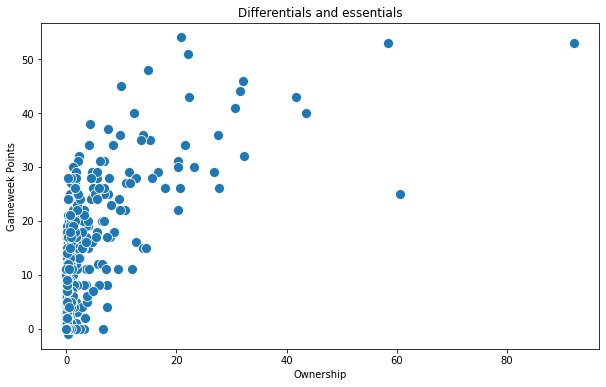

In [17]:
# df_fpl.head(6)
# selected_by_percent
# total_points


df_fpl['selected_by_percent'] = pd.to_numeric(df_fpl['selected_by_percent']) #.astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(df_fpl['selected_by_percent'], df_fpl['total_points'], s=100) #, hue=df_fpl['full_name']
plt.xlabel('Ownership')
plt.ylabel('Gameweek Points')
plt.title('Differentials and essentials')
plt.show()

/Users/richard/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


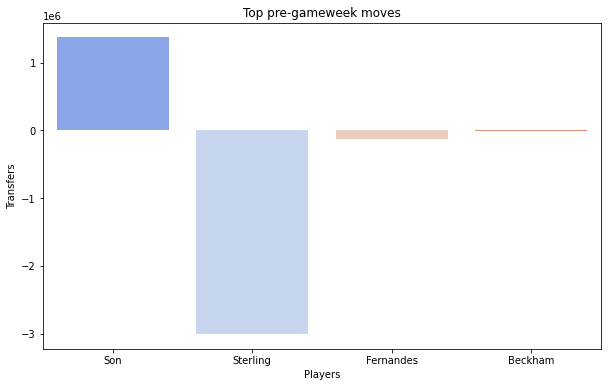

In [23]:
players = ['Son', 'Sterling', 'Fernandes', 'Beckham']
transfers = [1372000, -3005000, -130000, -10000]

plt.figure(figsize=(10, 6))
sns.barplot(players, transfers, palette='coolwarm')
plt.xlabel('Players')
plt.ylabel('Transfers')
plt.title('Top pre-gameweek moves')
plt.show()

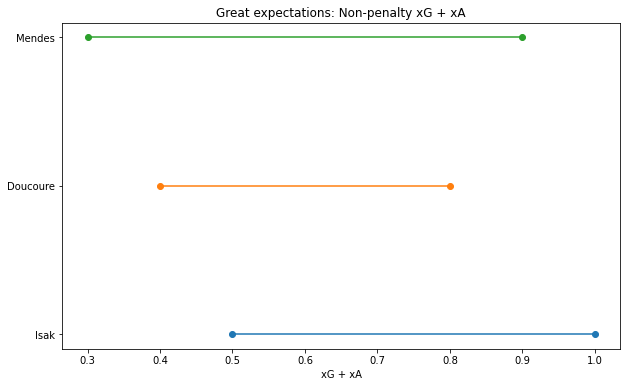

In [19]:
players = ['Isak', 'Doucoure', 'Mendes']
xg_values = [1.0, 0.8, 0.9]
xa_values = [0.5, 0.4, 0.3]

plt.figure(figsize=(10, 6))
for player, xg, xa in zip(players, xg_values, xa_values):
    plt.plot([xg, xa], [player, player], marker='o')
plt.xlabel('xG + xA')
plt.title('Great expectations: Non-penalty xG + xA')
plt.show()

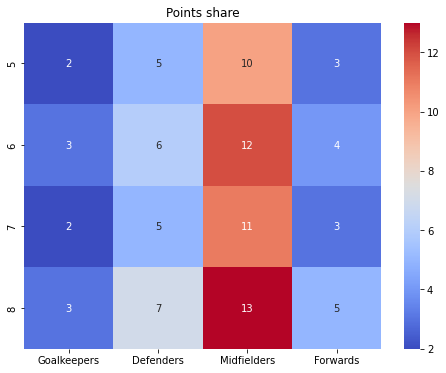

In [24]:
data = {
    'Goalkeepers': [2, 3, 2, 3],
    'Defenders': [5, 6, 5, 7],
    'Midfielders': [10, 12, 11, 13],
    'Forwards': [3, 4, 3, 5]
}
gameweeks = [5, 6, 7, 8]

heatmap_data = pd.DataFrame(data, index=gameweeks)
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Points share')
plt.show()

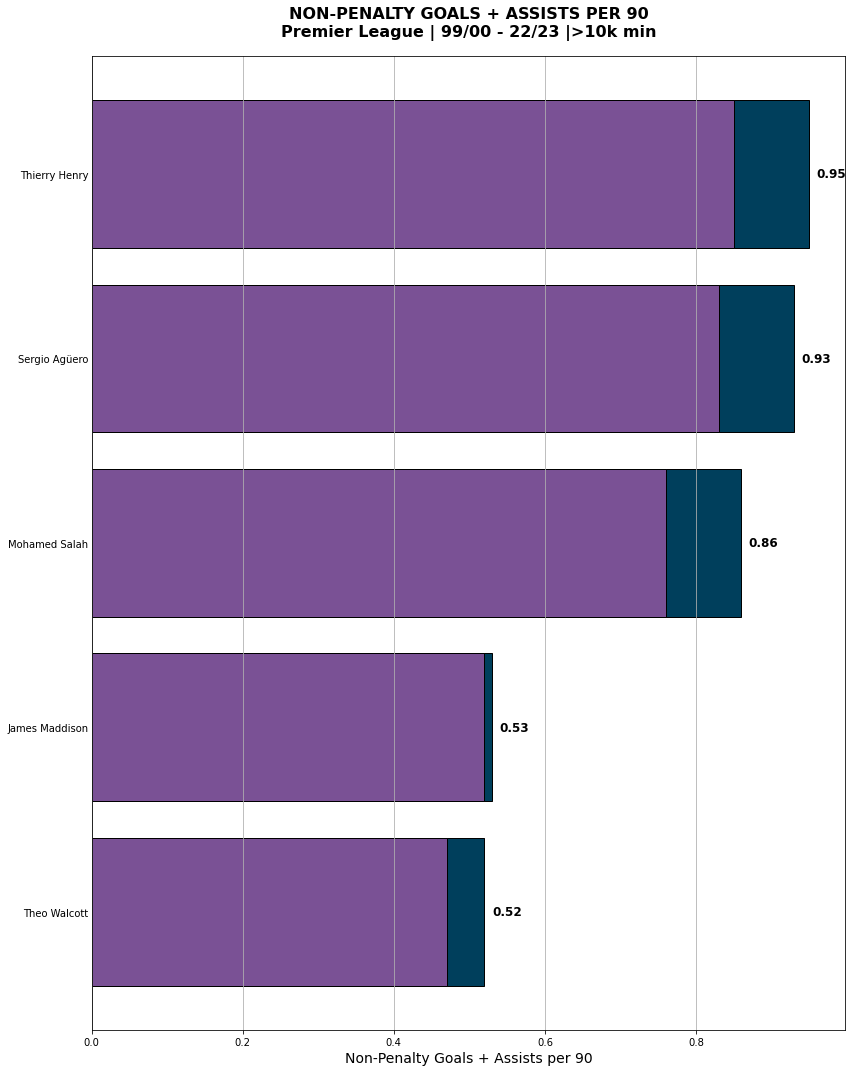

In [25]:
import matplotlib.pyplot as plt

# Sample Data
players = [
    "Thierry Henry", "Sergio Agüero", "Mohamed Salah",
    # ... (add other players here)
    "James Maddison", "Theo Walcott"
]

# Just for this example, I'm assuming the first value is non-penalty goals 
# and the second value is assists. You'll need to adjust these.
non_penalty_goals = [0.85, 0.83, 0.76, 0.52, 0.47]
assists = [0.10, 0.10, 0.10, 0.01, 0.05]

# Plotting
fig, ax = plt.subplots(figsize=(12, 15))

# Stacked Bar Chart
ax.barh(players, non_penalty_goals, color='#7a5195', label='Non-Penalty Goals per 90', edgecolor='black')
ax.barh(players, assists, left=non_penalty_goals, color='#003f5c', label='Assists per 90', edgecolor='black')

# Invert y-axis to have the player with the highest value on top
ax.invert_yaxis()

# Setting title and labels
ax.set_title("NON-PENALTY GOALS + ASSISTS PER 90\nPremier League | 99/00 - 22/23 |>10k min", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Non-Penalty Goals + Assists per 90", fontsize=14)

# Remove y-ticks
ax.tick_params(axis='y', which='both', length=0)
ax.grid(axis='x')

# Display the combined values next to the bars
for i, (g, a) in enumerate(zip(non_penalty_goals, assists)):
    ax.text(g + a + 0.01, i, 
            f"{g + a:.2f}", va='center', ha='left', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


In [27]:
import plotly.graph_objects as go

# Data
players = [
    "Joachim Andersen", "Kieran Trippier", "Benjamin White",
    "William Saliba", "Matty Cash", "Cristian Romero",
    "Marc Guéhi", "Tyrick Mitchell", "Micky van de Ven",
    "Axel Disasi", "Vladimir Coufal", "Levi Colwill",
    "Pedro Porro", "Destiny Udogie", "Pau Torres", "Kyle Walker"
]
points = [51, 49, 45, 36, 36, 36, 35, 34, 34, 34, 33, 33, 32, 32, 31, 31]

gameweeks = ["2", "4", "6", "8"]
scores = [
    [9, 2, 11, 1, 1, 6, 15, 6],
    [2, 2, 0, 1, 8, 18, 12, 6],
    [1, 7, 1, 2, 7, 4, 14, 9],
    [5, 8, 1, 2, 6, 1, 6, 7],
    [-1, 6, 17, -1, 1, 6, 6, 2],
    [7, 6, 7, 7, 2, -2, 1, 8],
    [6, 2, 2, 1, 0, 8, 7, 9],
    [8, 2, 2, 4, 1, 5, 6, 6],
    [1, 7, 6, 1, 1, 1, 2, 15],
    [11, 0, 6, 2, 5, 2, 6, 2],
    [2, 2, 2, 2, 4, 12, 5, 5],
    [2, 2, 1, 6, 2, 6, 2, 12],
    [0, 1, 6, 6, 4, 2, 1, 7],
    [1, 1, 5, 12, 5, 2, 0, 1],
    [0, 0, 6, 2, 1, 2, 8, 2],
    [6, 6, 6, 2, 2, 2, 11, 0]
]

# Creating the heatmap
fig = go.Figure(data=go.Heatmap(
    z=scores,
    x=gameweeks,
    y=[f"{player} ({point} points)" for player, point in zip(players, points)],
    hoverongaps=False,
    colorscale="reds",
    colorbar=dict(title='Points')
))

fig.update_layout(
    title="Points by gameweek: Defenders with over 30 points",
    xaxis_nticks=len(gameweeks),
    yaxis_nticks=len(players),
    xaxis_title="Gameweek",
    yaxis_title=None,
)

fig.show()


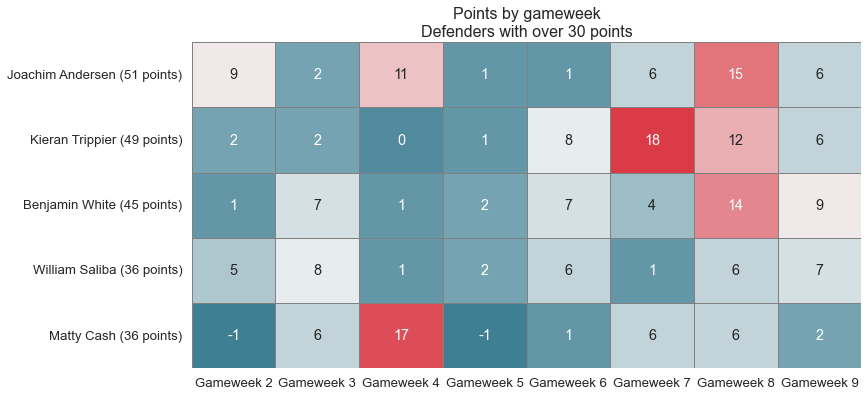

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data setup
players = [
    "Joachim Andersen (51 points)",
    "Kieran Trippier (49 points)",
    "Benjamin White (45 points)",
    "William Saliba (36 points)",
    "Matty Cash (36 points)"
]

gameweek_data = [
    [9, 2, 11, 1, 1, 6, 15, 6],
    [2, 2, 0, 1, 8, 18, 12, 6],
    [1, 7, 1, 2, 7, 4, 14, 9],
    [5, 8, 1, 2, 6, 1, 6, 7],
    [-1, 6, 17, -1, 1, 6, 6, 2]
]

df = pd.DataFrame(gameweek_data, columns=[f"Gameweek {i}" for i in [2, 3, 4, 5, 6, 7, 8, 9]], index=players)

# Plotting
plt.figure(figsize=(12, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Define color palette
sns.set(font_scale=1.2)
sns.heatmap(df, cmap=cmap, annot=True, fmt='g', linewidths=0.5, linecolor='gray', cbar=False)

# Title and display
plt.title("Points by gameweek\nDefenders with over 30 points", size=16)
plt.show()


In [28]:
import plotly.graph_objects as go

# Define the labels and values
labels = ["Non-Penalty Goal", "Big Chances", "Shot Quality", "On Target %", "Off Shots", "Dribbles Completed %", "Pressure Regains", "Turnovers"]
values = [77.4, 75.0, 23.3, 94.4, 57.8, 53.4, 84.6, 88.4]

# Create the plot
fig = go.Figure(data=go.Scatterpolar(
    r=values,
    theta=labels,
    fill='toself',
    name='Shooting'
))

# Set the layout and appearance
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]  # Set the maximum value of the radar chart
        )
    ),
    showlegend=False
)

fig.show()


In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Define the labels and values
labels = ["Non-Penalty Goal", "Big Chances", "Shot Quality", "On Target %", "Off Shots", "Dribbles Completed %", "Pressure Regains", "Turnovers"]

values_shooting = [77.4, 75.0, 23.3, 94.4, 57.8, 53.4, 84.6, 88.4]
values_creating = [72.0, 59.5, 82.3, 83.9, 84.1, 59.9, 78.1, 87.1]

# Create a subplot layout
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=(f'Shooting: {np.mean(values_shooting):.1f}', 
                                    f'Creating: {np.mean(values_creating):.1f}'),
                    specs=[[{'type': 'polar'}, {'type': 'polar'}]])

# Add traces for shooting and creating
fig.add_trace(go.Scatterpolar(r=values_shooting, theta=labels, fill='toself', name='Shooting'), row=1, col=1)
fig.add_trace(go.Scatterpolar(r=values_creating, theta=labels, fill='toself', name='Creating'), row=1, col=2)

# Update the layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    polar2=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    showlegend=False
)

fig.show()


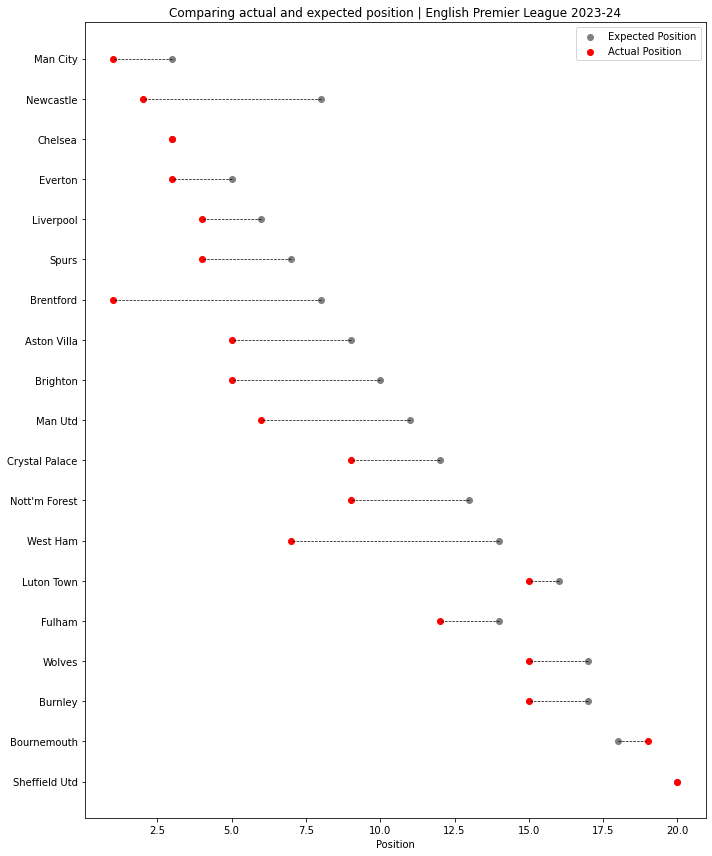

In [1]:
import matplotlib.pyplot as plt

teams = ["Man City", "Newcastle", "Chelsea", "Everton", "Liverpool", "Spurs", "Brentford", "Aston Villa",
         "Brighton", "Man Utd", "Crystal Palace", "Nott'm Forest", "West Ham", "Luton Town", "Fulham",
         "Wolves", "Burnley", "Bournemouth", "Sheffield Utd"]

actual_positions = [1, 2, 3, 3, 4, 4, 1, 5, 5, 6, 9, 9, 7, 15, 12, 15, 15, 19, 20]
expected_positions = [3, 8, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 14, 17, 17, 18, 20]

# Plotting
fig, ax = plt.subplots(figsize=(10, 12))
ax.scatter(expected_positions, range(len(teams)), color='gray', label="Expected Position")
ax.scatter(actual_positions, range(len(teams)), color='red', label="Actual Position")
ax.set_yticks(range(len(teams)))
ax.set_yticklabels(teams)
ax.invert_yaxis()  # Reverse y-axis to have top teams at the top
ax.set_xlabel("Position")
ax.set_title("Comparing actual and expected position | English Premier League 2023-24")
ax.legend()

# Draw lines between actual and expected positions
for i, team in enumerate(teams):
    ax.plot([expected_positions[i], actual_positions[i]], [i, i], color='black', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


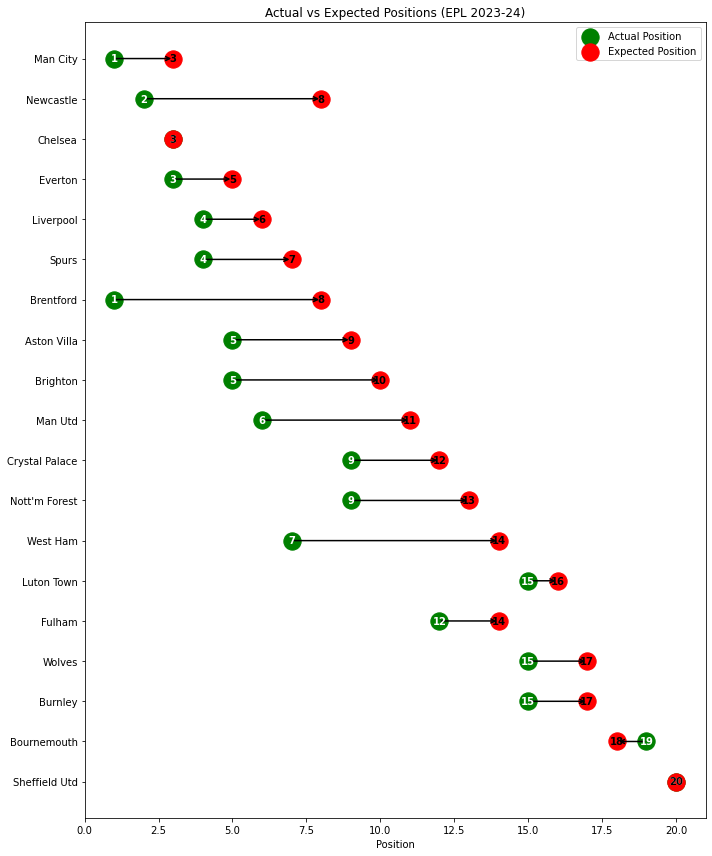

In [13]:
import matplotlib.pyplot as plt

teams = ["Man City", "Newcastle", "Chelsea", "Everton", "Liverpool", "Spurs", "Brentford", "Aston Villa",
         "Brighton", "Man Utd", "Crystal Palace", "Nott'm Forest", "West Ham", "Luton Town", "Fulham",
         "Wolves", "Burnley", "Bournemouth", "Sheffield Utd"]

actual_positions = [1, 2, 3, 3, 4, 4, 1, 5, 5, 6, 9, 9, 7, 15, 12, 15, 15, 19, 20]
expected_positions = [3, 8, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 14, 17, 17, 18, 20]

# Reverse the lists
teams = teams[::-1]
actual_positions = actual_positions[::-1]
expected_positions = expected_positions[::-1]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 12))

# Plot actual positions (in red) and expected positions (in yellow)
ax.scatter(actual_positions, teams, color='green', s=300, label="Actual Position")
ax.scatter(expected_positions, teams, color='red', s=300, label="Expected Position")

# Draw arrows between actual and expected positions
for team, actual, expected in zip(teams, actual_positions, expected_positions):
    ax.annotate("", xy=(expected, team), xytext=(actual, team),
                arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text(actual, team, str(actual), color='white', ha='center', va='center', weight='bold')
    ax.text(expected, team, str(expected), color='black', ha='center', va='center', weight='bold')

# Set labels, title and adjust x-axis
ax.set_xlabel("Position")
ax.set_title("Actual vs Expected Positions (EPL 2023-24)")
ax.set_xlim(0, 21)  # Set x-axis limits from 1 to 20
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [54]:
# Function to calculate xPts
def calculate_xPts(row):
    xG = row['xg']
    xA = row['xga']
    goal_diff = xG - xA
    
    # Adjusting the thresholds and probabilities to closely match the xPts value of 19.31
    if goal_diff > 1.5:
        p_win = 0.9
        p_draw = 0.07
        p_loss = 0.03
    elif goal_diff > 0.5:
        p_win = 0.75
        p_draw = 0.2
        p_loss = 0.05
    elif goal_diff > 0:
        p_win = 0.6
        p_draw = 0.3
        p_loss = 0.1
    else:
        p_win = 0.4
        p_draw = 0.4
        p_loss = 0.2
        
    # Calculating xPts based on the probabilities
    xPts = 3 * p_win + 1 * p_draw
    
    return xPts

In [82]:
import sqlite3
import pandas as pd

folder_db = '/data/databases/'
folder_raw = '/data/raw_files/'

# Get the directory of the current script
current_directory = os.path.abspath('')


db_path = os.path.join(current_directory + folder_db, "fbref_data_team_individual.db")
conn = sqlite3.connect(db_path)
df_individual_xpts = pd.read_sql_query('SELECT * FROM team_individual_tbl', conn)
conn.close()
df_individual_xpts = df_individual_xpts[df_individual_xpts['year'] == '2023-2024']
df_individual_xpts.tail(15)

,index,date,round,venue,result,gf,ga,opponent,xg,xga,possession,xg_roll,xga_roll,team,year
2596,10,2023-11-04 00:00:00,Matchweek 11,Home,L,0.0,1.0,Manchester Utd,1.0,0.7,45,1.01,1.64,Fulham,2023-2024
2597,10,2023-11-04 00:00:00,Matchweek 11,Home,L,0.0,2.0,Crystal Palace,1.1,1.3,67,0.9,1.83,Burnley,2023-2024
2598,10,2023-11-04 00:00:00,Matchweek 11,Home,D,1.0,1.0,Brighton,0.7,0.5,21,1.35,1.22,Everton,2023-2024
2599,10,2023-11-04 00:00:00,Matchweek 11,Home,W,3.0,2.0,West Ham,1.5,1.8,58,1.84,1.34,Brentford,2023-2024
2600,10,2023-11-04 00:00:00,Matchweek 11,Away,L,1.0,6.0,Manchester City,0.9,1.9,35,1.01,2.26,Bournemouth,2023-2024
2601,10,2023-11-04 00:00:00,Matchweek 11,Away,L,0.0,1.0,Newcastle Utd,0.6,1.0,58,1.85,0.76,Arsenal,2023-2024
2602,10,2023-11-04 00:00:00,Matchweek 11,Away,L,1.0,2.0,Sheffield Utd,1.2,1.0,61,1.22,1.65,Wolves,2023-2024
2603,10,2023-11-04 00:00:00,Matchweek 11,Away,W,2.0,0.0,Burnley,1.3,1.1,33,1.02,1.47,Crystal Palace,2023-2024
2604,10,2023-11-04 00:00:00,Matchweek 11,Away,D,1.0,1.0,Everton,0.5,0.7,79,1.53,1.45,Brighton,2023-2024
2605,10,2023-11-05 00:00:00,Matchweek 11,Away,L,0.0,2.0,Nott'ham Forest,1.2,0.4,73,1.87,1.17,Aston Villa,2023-2024


In [55]:
import numpy as np
from scipy.stats import poisson

def simulate_match(xG_home, xG_away, num_simulations=20000):
    # Simulate goals using Poisson distribution
    home_goals = poisson.rvs(mu=xG_home, size=num_simulations)
    away_goals = poisson.rvs(mu=xG_away, size=num_simulations)
    
    # Calculate wins, draws, losses
    home_wins = np.sum(home_goals > away_goals)
    draws = np.sum(home_goals == away_goals)
    away_wins = num_simulations - home_wins - draws
    
    # Calculate probabilities
    win_probability_home = home_wins / num_simulations
    draw_probability = draws / num_simulations
    win_probability_away = away_wins / num_simulations
    
    # Calculate expected points (xPts)
    xPts_home = (win_probability_home * 3.0) + (draw_probability * 1.0)
    xPts_away = (win_probability_away * 3.0) + (draw_probability * 1.0)
    
    return xPts_home, xPts_away

# Example
xG_Brentford = 1.3
xG_Arsenal = 1.4
xPts_Brentford, xPts_Arsenal = simulate_match(xG_Brentford, xG_Arsenal)
print(f"Expected Points for Brentford: {xPts_Brentford:.2f}")
print(f"Expected Points for Arsenal: {xPts_Arsenal:.2f}")


Expected Points for Brentford: 1.30
Expected Points for Arsenal: 1.44


In [83]:
import numpy as np
from scipy.stats import poisson
import pandas as pd

# Same simulate_match function as before
def simulate_match(xG_home, xG_away, num_simulations=20000):
    home_goals = poisson.rvs(mu=xG_home, size=num_simulations)
    away_goals = poisson.rvs(mu=xG_away, size=num_simulations)
    
    home_wins = np.sum(home_goals > away_goals)
    draws = np.sum(home_goals == away_goals)
    
    win_probability_home = home_wins / num_simulations
    draw_probability = draws / num_simulations
    
    xPts_home = (win_probability_home * 3.0) + (draw_probability * 1.0)
    return xPts_home

# Applying the simulate_match function to each row in the dataframe
df_individual_xpts['xPts'] = df_individual_xpts.apply(lambda row: simulate_match(row['xg'], row['xga']), axis=1)

df_individual_xpts.tail(10)


,index,date,round,venue,result,gf,ga,opponent,xg,xga,possession,xg_roll,xga_roll,team,year,xPts
2601,10,2023-11-04 00:00:00,Matchweek 11,Away,L,0.0,1.0,Newcastle Utd,0.6,1.0,58,1.85,0.76,Arsenal,2023-2024,0.98415
2602,10,2023-11-04 00:00:00,Matchweek 11,Away,L,1.0,2.0,Sheffield Utd,1.2,1.0,61,1.22,1.65,Wolves,2023-2024,1.50595
2603,10,2023-11-04 00:00:00,Matchweek 11,Away,W,2.0,0.0,Burnley,1.3,1.1,33,1.02,1.47,Crystal Palace,2023-2024,1.51070
2604,10,2023-11-04 00:00:00,Matchweek 11,Away,D,1.0,1.0,Everton,0.5,0.7,79,1.53,1.45,Brighton,2023-2024,1.09720
2605,10,2023-11-05 00:00:00,Matchweek 11,Away,L,0.0,2.0,Nott'ham Forest,1.2,0.4,73,1.87,1.17,Aston Villa,2023-2024,2.02260
2606,10,2023-11-05 00:00:00,Matchweek 11,Away,D,1.0,1.0,Luton Town,2.6,0.8,73,2.35,1.15,Liverpool,2023-2024,2.42680
2607,10,2023-11-05 00:00:00,Matchweek 11,Home,W,2.0,0.0,Aston Villa,0.4,1.2,27,1.03,1.59,Nott'ham Forest,2023-2024,0.69150
2608,10,2023-11-05 00:00:00,Matchweek 11,Home,D,1.0,1.0,Liverpool,0.8,2.6,27,1.1,1.85,Luton Town,2023-2024,0.42410
2609,10,2023-11-06 00:00:00,Matchweek 11,Away,W,4.0,1.0,Tottenham,4.0,0.9,60,2.09,1.09,Chelsea,2023-2024,2.74195
2610,10,2023-11-06 00:00:00,Matchweek 11,Home,L,1.0,4.0,Chelsea,0.9,4.0,40,1.71,1.43,Tottenham,2023-2024,0.19590


In [84]:
# Group by 'team' and sum 'xPts', then sort by the xPts values
team_xPts = df_individual_xpts.groupby('team')['xPts'].sum().sort_values(ascending=False)

# Convert the Series to a DataFrame
team_xPts_df = team_xPts.reset_index()

# Add a new 'Rank' column which provides a rank from 1 to the length of the DataFrame
team_xPts_df['Rank'] = team_xPts_df['xPts'].rank(ascending=False, method='min').astype(int)

print(team_xPts_df)


               team      xPts  Rank
0   Manchester City  22.50840     1
1         Liverpool  21.85145     2
2     Newcastle Utd  21.63450     3
3           Chelsea  21.08365     4
4           Arsenal  20.50835     5
5       Aston Villa  18.77050     6
6         Brentford  17.92485     7
7         Tottenham  17.39080     8
8          Brighton  17.01530     9
9           Everton  16.53890    10
10   Manchester Utd  13.92040    11
11   Crystal Palace  13.04615    12
12         West Ham  12.78220    13
13           Wolves  12.50505    14
14  Nott'ham Forest  12.36880    15
15           Fulham  11.70830    16
16       Luton Town  10.26920    17
17          Burnley   8.92210    18
18      Bournemouth   8.65450    19
19    Sheffield Utd   6.81910    20


In [85]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df_tables = pd.read_html(response)
df_tables_prem = df_tables[0]
cols = ['Rk', 'Squad', 'Pts']
df_tables_prem = df_tables_prem[cols]
# Display the first table from the fetched tables
print(df_tables_prem)


    Rk            Squad  Pts
0    1  Manchester City   27
1    2        Tottenham   26
2    3        Liverpool   24
3    4          Arsenal   24
4    5      Aston Villa   22
5    6    Newcastle Utd   20
6    7         Brighton   18
7    8   Manchester Utd   18
8    9        Brentford   16
9   10          Chelsea   15
10  11   Crystal Palace   15
11  12         West Ham   14
12  13  Nott'ham Forest   13
13  14           Wolves   12
14  15           Fulham   12
15  16          Everton   11
16  17       Luton Town    6
17  18      Bournemouth    6
18  19          Burnley    4
19  20    Sheffield Utd    4


In [86]:
df_tables_prem = df_tables[0]
cols = ['Rk', 'Squad', 'Pts']
df_tables_prem = df_tables_prem[cols]
# Display the first table from the fetched tables
print(df_tables_prem)

    Rk            Squad  Pts
0    1  Manchester City   27
1    2        Tottenham   26
2    3        Liverpool   24
3    4          Arsenal   24
4    5      Aston Villa   22
5    6    Newcastle Utd   20
6    7         Brighton   18
7    8   Manchester Utd   18
8    9        Brentford   16
9   10          Chelsea   15
10  11   Crystal Palace   15
11  12         West Ham   14
12  13  Nott'ham Forest   13
13  14           Wolves   12
14  15           Fulham   12
15  16          Everton   11
16  17       Luton Town    6
17  18      Bournemouth    6
18  19          Burnley    4
19  20    Sheffield Utd    4


In [87]:
merged_df = pd.merge(df_tables_prem, team_xPts_df, left_on='Squad', right_on='team', how='inner')
merged_df

,Rk,Squad,Pts,team,xPts,Rank
0,1,Manchester City,27,Manchester City,22.50840,1
1,2,Tottenham,26,Tottenham,17.39080,8
2,3,Liverpool,24,Liverpool,21.85145,2
3,4,Arsenal,24,Arsenal,20.50835,5
4,5,Aston Villa,22,Aston Villa,18.77050,6
5,6,Newcastle Utd,20,Newcastle Utd,21.63450,3
6,7,Brighton,18,Brighton,17.01530,9
7,8,Manchester Utd,18,Manchester Utd,13.92040,11
8,9,Brentford,16,Brentford,17.92485,7
9,10,Chelsea,15,Chelsea,21.08365,4


In [88]:
merged_df.to_csv('data/raw_files/tables_expected_actual.csv')

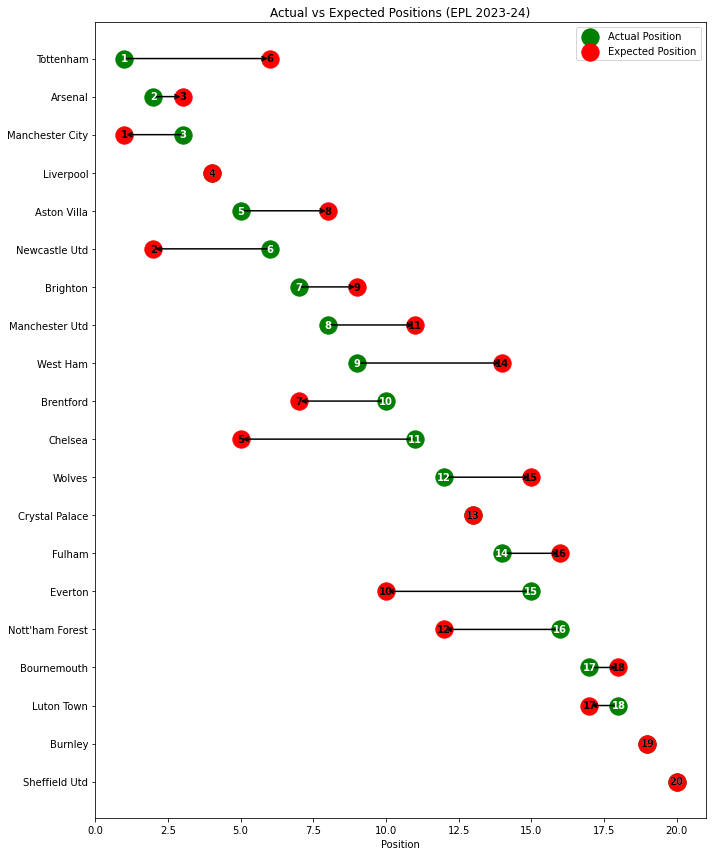

In [81]:
import matplotlib.pyplot as plt

teams = merged_df['team'].unique().tolist()

actual_positions = merged_df['Rk'].unique().tolist() #[1, 2, 3, 3, 4, 4, 1, 5, 5, 6, 9, 9, 7, 15, 12, 15, 15, 19, 20]
expected_positions = merged_df['Rank'].unique().tolist() #[3, 8, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 14, 17, 17, 18, 20]

# Reverse the lists
teams = teams[::-1]
actual_positions = actual_positions[::-1]
expected_positions = expected_positions[::-1]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 12))

# Plot actual positions (in red) and expected positions (in yellow)
ax.scatter(actual_positions, teams, color='green', s=300, label="Actual Position")
ax.scatter(expected_positions, teams, color='red', s=300, label="Expected Position")

# Draw arrows between actual and expected positions
for team, actual, expected in zip(teams, actual_positions, expected_positions):
    ax.annotate("", xy=(expected, team), xytext=(actual, team),
                arrowprops=dict(arrowstyle="->", lw=1.5))
    ax.text(actual, team, str(actual), color='white', ha='center', va='center', weight='bold')
    ax.text(expected, team, str(expected), color='black', ha='center', va='center', weight='bold')

# Set labels, title and adjust x-axis
ax.set_xlabel("Position")
ax.set_title("Actual vs Expected Positions (EPL 2023-24)")
ax.set_xlim(0, 21)  # Set x-axis limits from 1 to 20
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()
